In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('owid-covid-data.xlsx', usecols='C,D,K')
df.rename(columns={'location':'국가','date':'일자', 'total_cases_per_million':'발생률'}, inplace=True)
df = df.fillna(0)
df['일자'] = pd.to_datetime(df['일자'])
df['일자'] = df['일자'].dt.strftime('%y.%m.%d')
df = df[df['일자'] == '22.10.20']
df

,국가,일자,발생률
969,Afghanistan,22.10.20,5031.240
1950,Africa,22.10.20,8885.892
2919,Albania,22.10.20,116550.893
3888,Algeria,22.10.20,6129.050
4851,Andorra,22.10.20,587709.087
...,...,...,...
225162,Wallis and Futuna,22.10.20,65451.105
226166,World,22.10.20,79247.825
227090,Yemen,22.10.20,361.989
228037,Zambia,22.10.20,17133.562


In [3]:
continents = ['Africa', 'Asia', 'Europe', 'European Union', 'High income', 'Upper middle income', 'Low income', 
              'Lower middle income', 'North America', 'South Africa', 'South America', 'World']
filt = df['국가'].isin(continents) 
df = df[~filt]
df

,국가,일자,발생률
969,Afghanistan,22.10.20,5031.240
2919,Albania,22.10.20,116550.893
3888,Algeria,22.10.20,6129.050
4851,Andorra,22.10.20,587709.087
5796,Angola,22.10.20,2988.977
...,...,...,...
223490,Vietnam,22.10.20,117944.030
225162,Wallis and Futuna,22.10.20,65451.105
227090,Yemen,22.10.20,361.989
228037,Zambia,22.10.20,17133.562


In [4]:
country_with_rank = df[['국가', '발생률']]
country_with_rank = country_with_rank.sort_values(by=['발생률'], ascending=0)
country_with_rank.head(3)

,국가,발생률
51450,Cyprus,662430.093
68801,Faeroe Islands,655309.333
177083,San Marino,634149.233


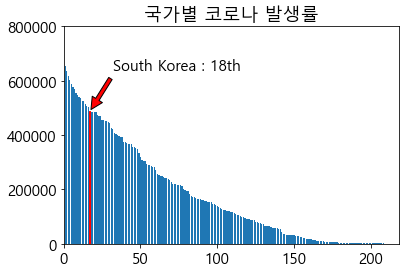

In [5]:
country_list = country_with_rank['국가'].tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank['발생률'].tolist()

bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index('South Korea')].set_color('r')
plt.title('국가별 코로나 발생률')
plt.axis([0, 218, 0, 800000])

korea_rank = country_list.index('South Korea')
korea_incidence_rate = country_with_rank[country_with_rank['국가'] == 'South Korea']['발생률'].values[0]
if korea_rank % 10 == 0 and korea_rank // 10 != 1:
    plt.annotate('South Korea : ' + str(korea_rank + 1) + 'st',
                xy=(korea_rank, korea_incidence_rate),
                xytext=(korea_rank + 15, korea_incidence_rate + 150000),
                arrowprops=dict(facecolor='red', shrink=0.05))
elif korea_rank % 10 == 1 and korea_rank // 10 != 1:
    plt.annotate('South Korea : ' + str(korea_rank + 1) + 'nd',
                xy=(korea_rank, korea_incidence_rate),
                xytext=(korea_rank + 15, korea_incidence_rate + 150000),
                arrowprops=dict(facecolor='red', shrink=0.05))
elif korea_rank % 10 == 2 and korea_rank // 10 != 1:
    plt.annotate('South Korea : ' + str(korea_rank + 1) + 'rd',
                xy=(korea_rank, korea_incidence_rate),
                xytext=(korea_rank + 15, korea_incidence_rate + 150000),
                arrowprops=dict(facecolor='red', shrink=0.05))
else:
    plt.annotate('South Korea : ' + str(korea_rank + 1) + 'th',
                xy=(korea_rank, korea_incidence_rate),
                xytext=(korea_rank + 15, korea_incidence_rate + 150000),
                arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()